In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt  # for making figures
import random
from makemore import (
    PytorchifiedBatchNorm,
    Embedding,
    Flatten,
    Linear,
    Tanh,
    BatchNorm1d,
    load_words,
)

%matplotlib inline

In [2]:
# read in all the words
words = open("names.txt", "r").read().splitlines()
print(len(words))
print(max(len(w) for w in words))
print(words[:8])

32033
15
['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']


In [3]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set("".join(words))))
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i: s for s, i in stoi.items()}
vocab_size = len(itos)
print(itos)
print(vocab_size)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
27


In [4]:
# build the dataset
block_size = (
    3  # context length: how many characters do we take to predict the next one?
)


def build_dataset(words):
    X, Y = [], []

    for w in words:
        context = [0] * block_size
        for ch in w + ".":
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]  # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y


random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])  # 80%
Xdev, Ydev = build_dataset(words[n1:n2])  # 10%
Xte, Yte = build_dataset(words[n2:])  # 10%

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [5]:
train_words, dev_words, test_words = load_words()

In [6]:
pytorchified = PytorchifiedBatchNorm([200], batchnorm_output=False)

In [7]:
lossi, ud = pytorchified.train(train_words)

Epoch 0 Loss: 2.408931172444206
Epoch 1 Loss: 2.2987571138941547
Epoch 2 Loss: 2.267207944972575
Epoch 3 Loss: 2.2468711524537666
Epoch 4 Loss: 2.233823009071946
Epoch 5 Loss: 2.224311261788693
Epoch 6 Loss: 2.2159151622633657
Epoch 7 Loss: 2.2086611881154026
Epoch 8 Loss: 2.205040375796049
Epoch 9 Loss: 2.199877395423217
Epoch 10 Loss: 2.195951164427672
Epoch 11 Loss: 2.1926260223135987
Epoch 12 Loss: 2.188697889847261
Epoch 13 Loss: 2.186906627781204
Epoch 14 Loss: 2.184484979022405
Epoch 15 Loss: 2.1827332641099875
Epoch 16 Loss: 2.1807155639043
Epoch 17 Loss: 2.1804944023079447
Epoch 18 Loss: 2.178086965099555
Epoch 19 Loss: 2.1764223035918473
Epoch 20 Loss: 2.1750251244486245
Learning rate reduced to 0.01
Epoch 21 Loss: 2.1106066188178034
Epoch 22 Loss: 2.106399142735882
Epoch 23 Loss: 2.105466505982914
Epoch 24 Loss: 2.1043816747780872
Epoch 25 Loss: 2.103155057207286
Epoch 26 Loss: 2.102138749066728
Epoch 27 Loss: 2.1035475361282354
Epoch 28 Loss: 2.1023466752733886
Epoch 29 Los

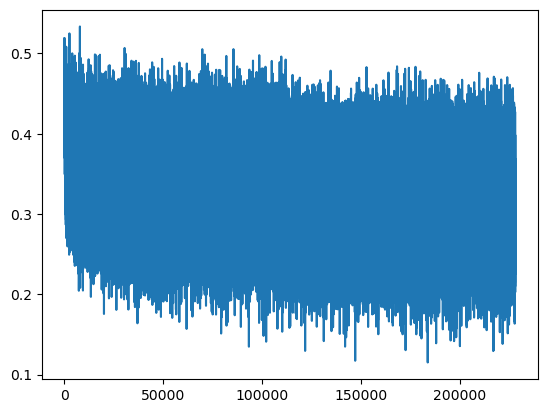

In [8]:
plt.plot(lossi)

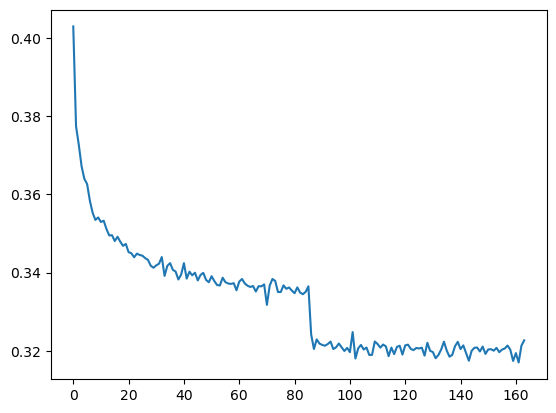

In [9]:
plt.plot(torch.tensor(lossi).view(-1, 1390).mean(1))

In [10]:
print(pytorchified.evaluate(dev_words))
print(pytorchified.evaluate(test_words))

2.1083099842071533
2.1076760292053223


In [11]:
for _ in range(20):
    print(pytorchified.forward())

ari
franya
quiny
melin
demie
sha
brey
milan
breanarlynnessiah
lordaracob
zyri
aleen
ristley
wil
shanten
amdyn
mika
jowilfarrelie
waylias
alalaydrenabi
